In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

## Task 1

### Default GridSearchCV


In [2]:
X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X[y < 2], y[y < 2], random_state=100
)

svm_model = SVC(kernel="linear")

params_grid = {
    "C": np.arange(3, 10),
    "max_iter": np.arange(1000, 10000, 1000),
}

grid_svm = GridSearchCV(svm_model, params_grid).fit(X_train, y_train)

print(f"Grid best parameter: {grid_svm.best_params_}")
print(f"Grid best score: {grid_svm.best_score_}")

Grid best parameter: {'C': 3, 'max_iter': 1000}
Grid best score: 1.0


### GridSearchCV with `roc_auc`

In [3]:
grid_svm_auc = GridSearchCV(svm_model, params_grid, scoring="roc_auc").fit(
    X_train, y_train
)

y_grid_auc_scores = grid_svm_auc.decision_function(X_test)
print(f"Test set AUC: {roc_auc_score(y_test, y_grid_auc_scores)}")

print(f"Grid best parameter (max. AUC): {grid_svm_auc.best_params_}")
print(f"Grid best score (AUC): {grid_svm_auc.best_score_}")

Test set AUC: 1.0
Grid best parameter (max. AUC): {'C': 3, 'max_iter': 1000}
Grid best score (AUC): 1.0


## Task 2

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB

In [5]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = GaussianNB().fit(X_train, y_train)
accuracy_train = clf.score(X_train, y_train)
accuracy_test = clf.score(X_test, y_test)
print(
    "accuracy_train = {:.3%}\naccuracy_test = {:.3%}".format(
        accuracy_train, accuracy_test
    )
)

accuracy_train = 95.070%
accuracy_test = 93.706%


In [6]:
from matplotlib.colors import  ListedColormap
import matplotlib as mpl

In [7]:
def plot_decision_boundary(model, X, y, title):
    # visualize decisiaon boundary
    custom_colors = [mpl.cm.viridis(.45),mpl.cm.viridis(.25)]
    custom_cmap = ListedColormap(custom_colors)


    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = X[:, 0].min() - 0.1,X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Obtain labels for each point in mesh using model
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)
    model.fit(X_train[:,:2], y_train)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.figure()

    plt.contourf(xx, yy, Z, cmap=custom_cmap)
    plt.title(title)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=custom_cmap, edgecolor = 'black')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.show()

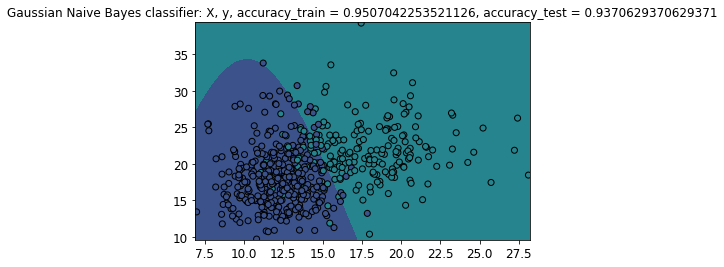

In [8]:
plot_decision_boundary(clf, X, y, title=f"Gaussian Naive Bayes classifier: X, y, accuracy_train = {accuracy_train}, accuracy_test = {accuracy_test}")

## Task 3. Titanic - Machine Learning from Disaster

Predict survival on the [Titanic](https://www.kaggle.com/c/titanic)

In [24]:
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [25]:
def get_train_and_test_data(path = os.getcwd() + "/data/"):
    train_data = pd.read_csv(path + "train.csv")
    test_data = pd.read_csv(path + "test.csv")

    le = LabelEncoder()
    train_data["Sex"] = le.fit_transform(train_data["Sex"])
    test_data["Sex"] = le.fit_transform(test_data["Sex"])

    return train_data, test_data


In [26]:
# get train and test data
train_data, test_data = get_train_and_test_data()

# define features
features = ["Pclass", "Sex", "SibSp", "Parch"]

# get needed info for test data
X_Test = test_data[features]

# define X, y
X, y = train_data[features], train_data["Survived"]

# create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# check shapes
print(f"Shape of X_train = {X_train.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of X_test = {X_test.shape}")
print(f"Shape of y_test = {y_test.shape}")


Shape of X_train = (668, 4)
Shape of y_train = (668,)
Shape of X_test = (223, 4)
Shape of y_test = (223,)


In [27]:
clf = RandomForestClassifier(random_state=1)

params_grid = {'n_estimators': np.arange(1,50,10), "max_depth": np.arange(1,20,2)}

grid_svm = GridSearchCV(clf, params_grid).fit(X_train, y_train)

print(f"Grid best parameter: {grid_svm.best_params_}")
print(f"Grid best score: {grid_svm.best_score_}")

Grid best parameter: {'max_depth': 3, 'n_estimators': 41}
Grid best score: 0.8038716193468746


In [28]:
clf = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41).fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.8026905829596412


In [30]:
predictions = clf.predict(X_Test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
